# Estymatory największej wiarygodności

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [5]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

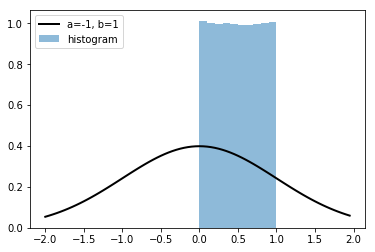

In [6]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

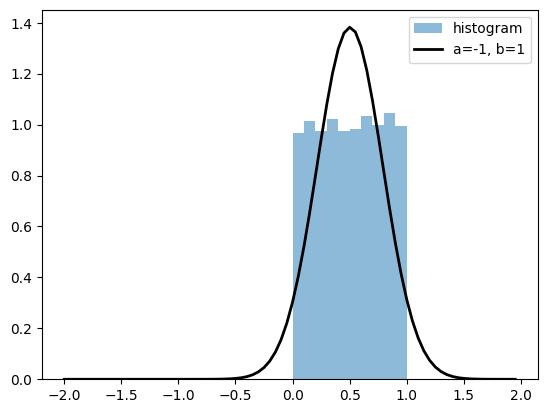

In [4]:
N = 10000
u=stats.uniform()
data = u.rvs(size=N)
mu= np.sum(data)/len(data)
sigma = np.sqrt(np.sum((data-mu)**2) /len(data))

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

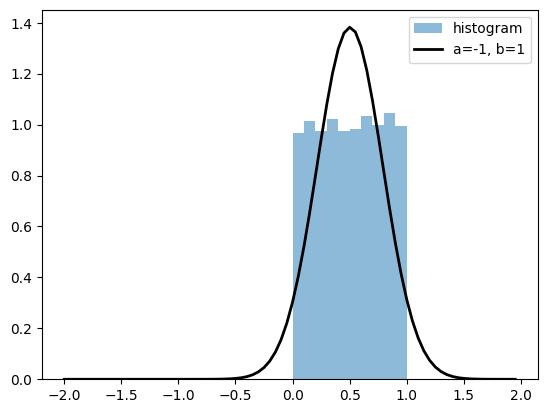

In [5]:


mu, sigma = stats.norm.fit(data)

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()



# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [19]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [24]:


def MLE(x):
    m, sigma = x
    s = 0
    for i in range(data.size):
        s += np.log( Gpdf(data[i], m, abs(sigma)) )
    return -1*s

x0 = np.asarray((0, 1))
print(MLE(x0))



10869.597432371438


# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [25]:


print(MLE((0,1)))
print(MLE((0,2)))
print(MLE((1,1)))
print(MLE((.5,.2)))



10869.597432371438
16540.91016272733
10842.549510148836
3512.2096880412287


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [26]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [30]:



x0 = np.asarray((0, 1))
min_value = optimize.fmin_cg(MLE, x0)
print(min_value)




         Current function value: nan
         Iterations: 0
         Function evaluations: 3
         Gradient evaluations: 1
[0 0]


C:\Users\tomek\AppData\Local\Temp\ipykernel_6612\2277730575.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))
C:\Users\tomek\AppData\Local\Temp\ipykernel_6612\2277730575.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))
C:\Users\tomek\AppData\Local\Temp\ipykernel_6612\3375597860.py:5: RuntimeWarning: divide by zero encountered in log
  s += np.log( Gpdf(data[i], m, abs(sigma)) )


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [36]:


def gauss_split(x, mu, sigma,tau):
        pivot=np.searchsorted(x,mu)

        left= x[:pivot]
        right=x[pivot:]

        return np.sqrt(2/np.pi) * 1/(1 + tau) *(1/sigma) * np.concatenate([
           np.e ** (-(left-mu)**2/(2 * sigma**2)),
           np.e ** (-(right-mu)**2/(2 * tau**2 * sigma**2))])



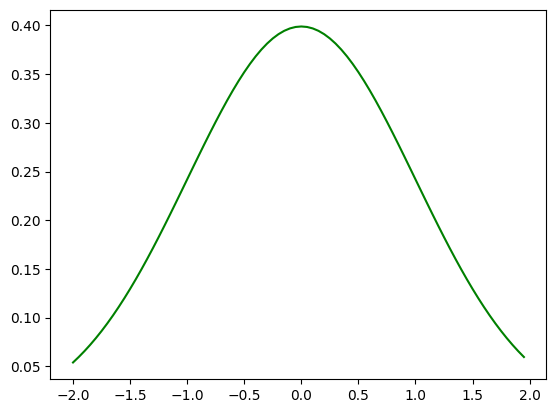

In [48]:


t = np.arange(-2, 2, 0.05)
 
mu = 0
sigma = 1
tau = 1
 
fig, ax = plt.subplots(1, 1)
ax.plot(t, gauss_split(t,mu, sigma, tau), 'g-', label='mu = 0, sigma = 1, tau = 1')
plt.show()


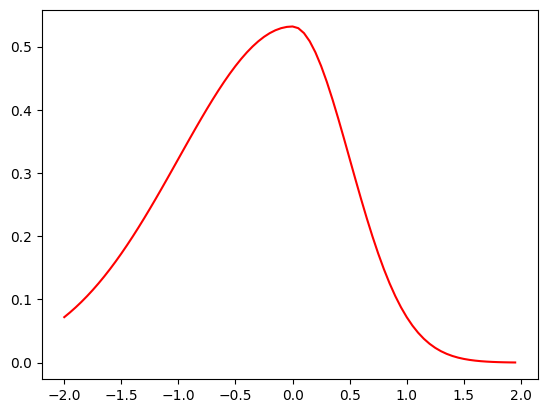

In [43]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)

mu = 0
sigma = 1
tau = 0.5
 
ax.plot(t, gauss_split(t,mu, sigma, tau), 'r-', label='mu = 0, sigma = 1, tau = 0.5')
plt.show()

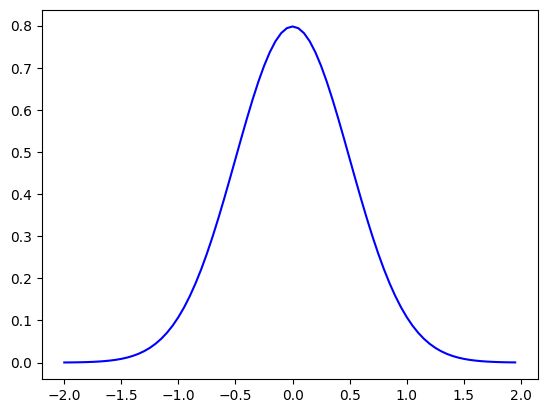

In [46]:

t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
mu = 0
sigma = 0.5
tau = 1
 
ax.plot(t, gauss_split(t,mu, sigma, tau), 'b-', label='mu = 1, sigma = 0.5, tau = 1')
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [49]:


def mle_2(x):
    mu, sigma, tau = x
    return -np.sum(np.log(gauss_split(x,mu,np.abs(sigma),np.abs(tau))))



# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [50]:


x1 = np.asarray((1, 1, 1))  # Initial guess.
res1 = optimize.fmin_cg(mle_2, x1)
print(res1)



         Current function value: -9.197024
         Iterations: 17
         Function evaluations: 297
         Gradient evaluations: 72
[-0.0086203  -0.03253743 -0.02078011]


C:\Users\tomek\AppData\Local\Temp\ipykernel_6612\3587306815.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(gauss_split(x,mu,np.abs(sigma),np.abs(tau))))
C:\Python39\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\tomek\AppData\Local\Temp\ipykernel_6612\3587306815.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(gauss_split(x,mu,np.abs(sigma),np.abs(tau))))
C:\Python39\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\tomek\AppData\Local\Temp\ipykernel_6612\3587306815.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(gauss_split(x,mu,np.abs(sigma),np.abs(tau))))


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [51]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

         Current function value: 1094.276701
         Iterations: 1
         Function evaluations: 51
         Gradient evaluations: 17
[3.7950427  2.10362835]


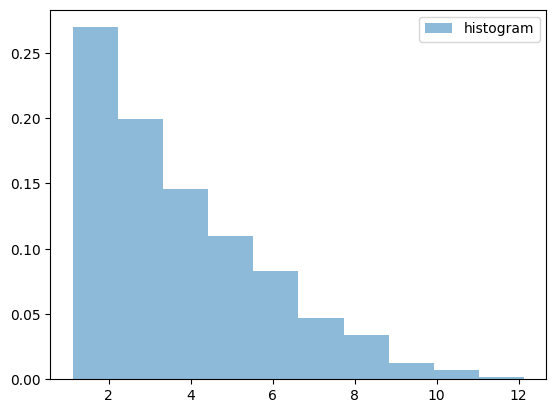

         Current function value: 6.952571
         Iterations: 0
         Function evaluations: 161
         Gradient evaluations: 39
[3.79504269 2.10362836 2.10362836]


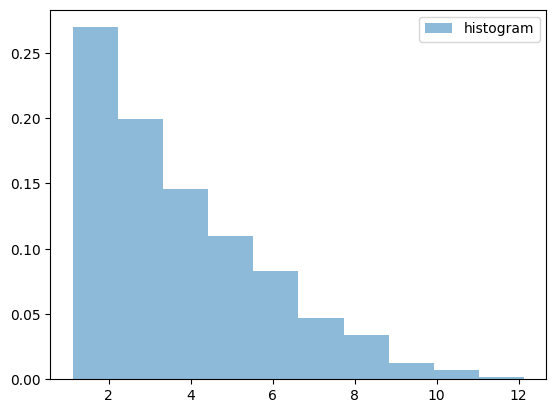

In [52]:


mu = np.mean(data)
sigma = np.std(data)
tau = np.std(data)

x1 = np.asarray((mu,sigma))  # Initial guess.
res1 = optimize.fmin_cg(MLE, x1)
print(res1)


t = np.arange(-2, 12, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.legend()
plt.show()


###########################


x1 = np.asarray((mu,sigma,tau))  # Initial guess.
res1 = optimize.fmin_cg(mle_2, x1)
print(res1)


t = np.arange(-2, 12, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.legend()
plt.show()

